In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
import matplotlib.pyplot as plt


# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

In [2]:
data = pd.read_csv('case1Data.csv')
y = data['y']
X = data.drop('y', axis=1)
# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

In [3]:
# impute missing values with mean
X_imputed_mean = X.fillna(X.mean())

# check if there are any columns with zero variance
variance = np.var(X_imputed_mean, axis=0)
zero_var_cols = np.where(variance == 0)[0]
print('Zero variance columns:', zero_var_cols)

# drop columns with zero variance
X_imputed_mean = X_imputed_mean.drop(X_imputed_mean.columns[zero_var_cols], axis=1)
print('Columns dropped:', X.columns[zero_var_cols])

# devide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_mean, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train_standardardized = scaler.fit_transform(X_train)
X_test_standardardized = scaler.transform(X_test)

X_standardized = scaler.fit_transform(X_imputed_mean)

Zero variance columns: [96]
Columns dropped: Index(['C_02'], dtype='object')


In [12]:
def knn(K, X, n):
    yhat = np.zeros(n)
    distances = np.zeros(n)
    # For each obs, compare distance to all other points in X
    for i in range(n):
        for j in range(n):
            distances[j] = distance.euclidean(X[i,:], X[j, :])

        # Sort all the distances
        idx = np.argsort(distances)[1:(K + 1)] # Skip first, as distance to "itself" does not make sense

        yhat[i] = np.mean(y[idx]) # Final value is mean of nearest neighbors
        
    return yhat

K = 15 # number of neighbours
yhat = knn(K, X_standardized, n)
rmse = np.sqrt(np.mean((y-yhat) ** 2))
# test implementation
print(f'RMSE value for K = {K} is: {rmse}')

RMSE value for K = 15 is: 66.44911506304885


RMSE value for K = 5 is: 69.15681421802385
RMSE value for K = 6 is: 67.12809678755755
RMSE value for K = 7 is: 65.81401211642499
RMSE value for K = 8 is: 67.01526402035232
RMSE value for K = 9 is: 67.02777665868321
RMSE value for K = 10 is: 67.28817552818103
RMSE value for K = 11 is: 67.68278562696517
RMSE value for K = 12 is: 67.09539869054584
RMSE value for K = 13 is: 66.23822692653518
RMSE value for K = 14 is: 66.61576956030846
RMSE value for K = 15 is: 66.44911506304885
RMSE value for K = 16 is: 65.827083943718
RMSE value for K = 17 is: 65.86947369709159
RMSE value for K = 18 is: 64.59748531713319
RMSE value for K = 19 is: 64.97376983101842
RMSE value for K = 20 is: 65.52757702265593
RMSE value for K = 21 is: 65.66233523128128
RMSE value for K = 22 is: 65.62723585062191
RMSE value for K = 23 is: 65.80963864987035
RMSE value for K = 24 is: 65.78572916129133
RMSE value for K = 25 is: 65.99009534474716

K = 14 has the lowest RMSE: 64.59748531713319


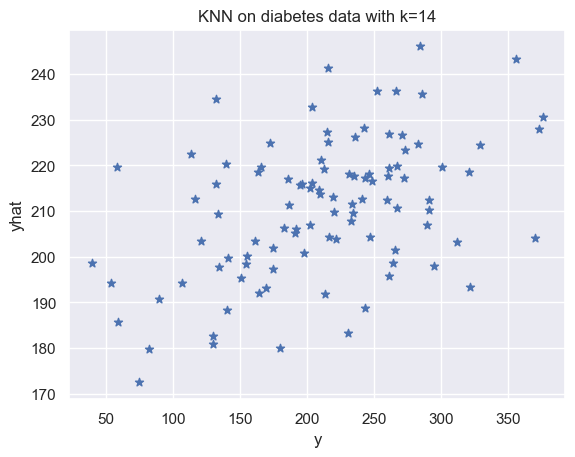

In [17]:
rmse_values = [] #to store mse values for different k

for k in range (5,26):
    yhat = knn(k, X_standardized, n)
    rmse = np.sqrt(np.mean((y-yhat) ** 2))
    rmse_values.append(rmse)
    print(f'RMSE value for K = {k} is: {rmse}')


k_best = rmse_values.index(np.min(rmse_values)) + 1
print(f'\nK = {k_best} has the lowest RMSE: {np.min(rmse_values)}')

yhat = knn(k_best, X_standardized, n)
plt.scatter(y, yhat, marker = "*")
plt.xlabel("y")
plt.ylabel("yhat")
plt.title(f'KNN on diabetes data with k={k_best}')
plt.show()